# Machine Learning 2024/2025 - Progress Task 2 (Data Preprocessing)

## Introduction

**Statement for the task:**

In this competition-style task, your objective is to build a predictive model that estimates the likelihood of individuals receiving two different vaccines: the H1N1 flu vaccine and the seasonal flu vaccine. You will create two separate probability predictions for each individual in the dataset: 
- h1n1_vaccine: The probability that an individual receives the H1N1 flu vaccine. 
- seasonal_vaccine: The probability that an individual receives the seasonal flu vaccine. 

All the information about the task is on the following site: 
https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

## Preparation of Environmental Variables

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
PATH_DATA = 'data/'
train_features = pd.read_csv(PATH_DATA + 'training_set_features.csv')
train_labels = pd.read_csv(PATH_DATA + 'training_set_labels.csv')
test_features = pd.read_csv(PATH_DATA + 'test_set_features.csv')

## Exploratory Data Analysis (EDA)

Let's focus first on training data.

## Dataset description

In [96]:
# Check dataset columns, and dytpes for features
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Taking a look at this summary of the dataset info, we can see that there are different values for Non-Null count for each column. This means that there are missing values in the dataset. We will have to deal with them later.

In [97]:
# Check the first 3 rows of the dataset
train_features.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [98]:
# Check labels dataset
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [99]:
train_labels.head(3)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0


Label description from the competition site:

- h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

We can see that both datasets share one column, which is `respondent_id`. This column is the unique identifier for each respondent is use to relate the two datasets. We will set this column as the index for both datasets.

In [100]:
# Set the ID as index
train_features.set_index('respondent_id', inplace=True)
train_labels.set_index('respondent_id', inplace=True)

In [101]:
print("=================== SHAPE =====================")
print("Features (people, features): ",train_features.shape)
print("Labels   (people, labels):   ",train_labels.shape)

=================== SHAPE =====================
Features (people, features):  (26707, 35)
Labels   (people, labels):    (26707, 2)


Also, we will merge both datasets into one, so we can have all the information in one place and not having to deal with several variables.

In [102]:
df_patients = pd.concat([train_features, train_labels], axis=1)
# Check that the columns are concatenated
df_patients.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

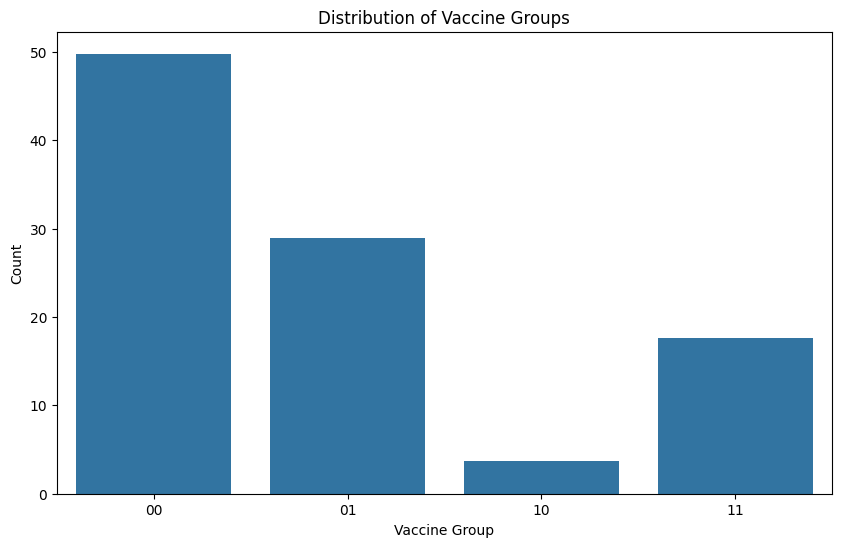

In [103]:
# Plot the distribution of h1n1_vaccine and seasonal_vaccine
# Group the labels into 00, 01, 10, 11
df_patients['vaccine_group'] = df_patients['h1n1_vaccine'].astype(str) + df_patients['seasonal_vaccine'].astype(str)

# Plot the distribution of the vaccine groups
plt.figure(figsize=(10, 6))
sns.countplot(x='vaccine_group', data=df_patients, order=['00', '01', '10', '11'], stat='percent')
plt.xlabel('Vaccine Group')
plt.ylabel('Count')
plt.title('Distribution of Vaccine Groups')
plt.show()

------------


## Null values

**WARNING**: this section should not be changed. Null values can't be dropped

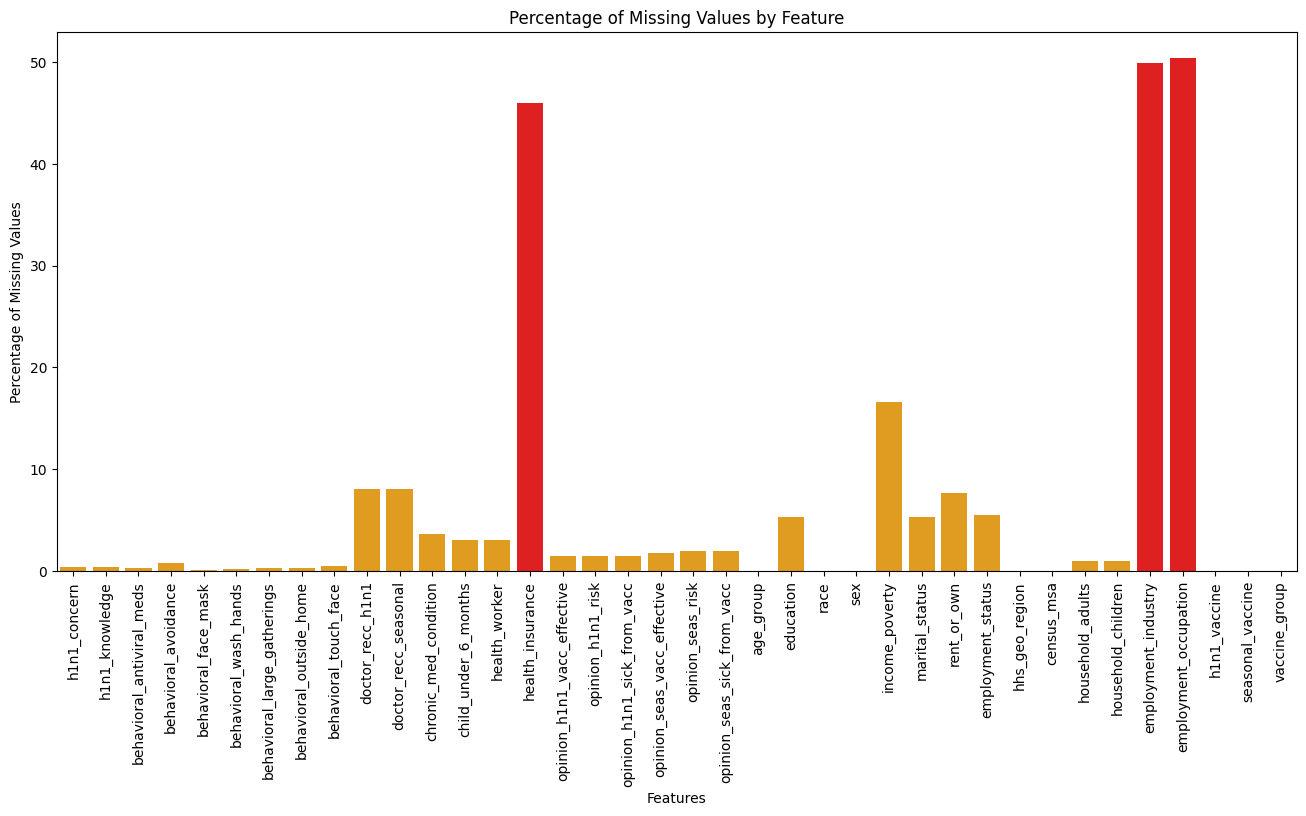

In [104]:
null = df_patients.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (null / len(df_patients)) * 100

# Plot the missing values
plt.figure(figsize=(16, 7))
colors = ['red' if val > 20 else 'orange' for val in missing_percentage.values]
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=colors, hue=missing_percentage.index, legend=False)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.title('Percentage of Missing Values by Feature')
plt.show()

Now, we are going to explore the top 3 columns with the most missing values:
* employment_industry
* employment_occupation
* health_insurance

In [105]:
df_patients['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [106]:
df_patients['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

In [107]:
# drop columns with no information
# df_patients.drop(columns = ['employment_industry', 'employment_occupation'], inplace=True)

In [108]:
# print("original values: ", df_patients['health_insurance'].unique()) # 0 = no, 1 = yes, na = unknown--> change to 2
# df_patients['health_insurance'] = df_patients['health_insurance'].fillna(2)
# print("new values: ", df_patients['health_insurance'].unique()) 

In [109]:
df_patients.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine',
       'vaccine_group'],
      dtype='object')

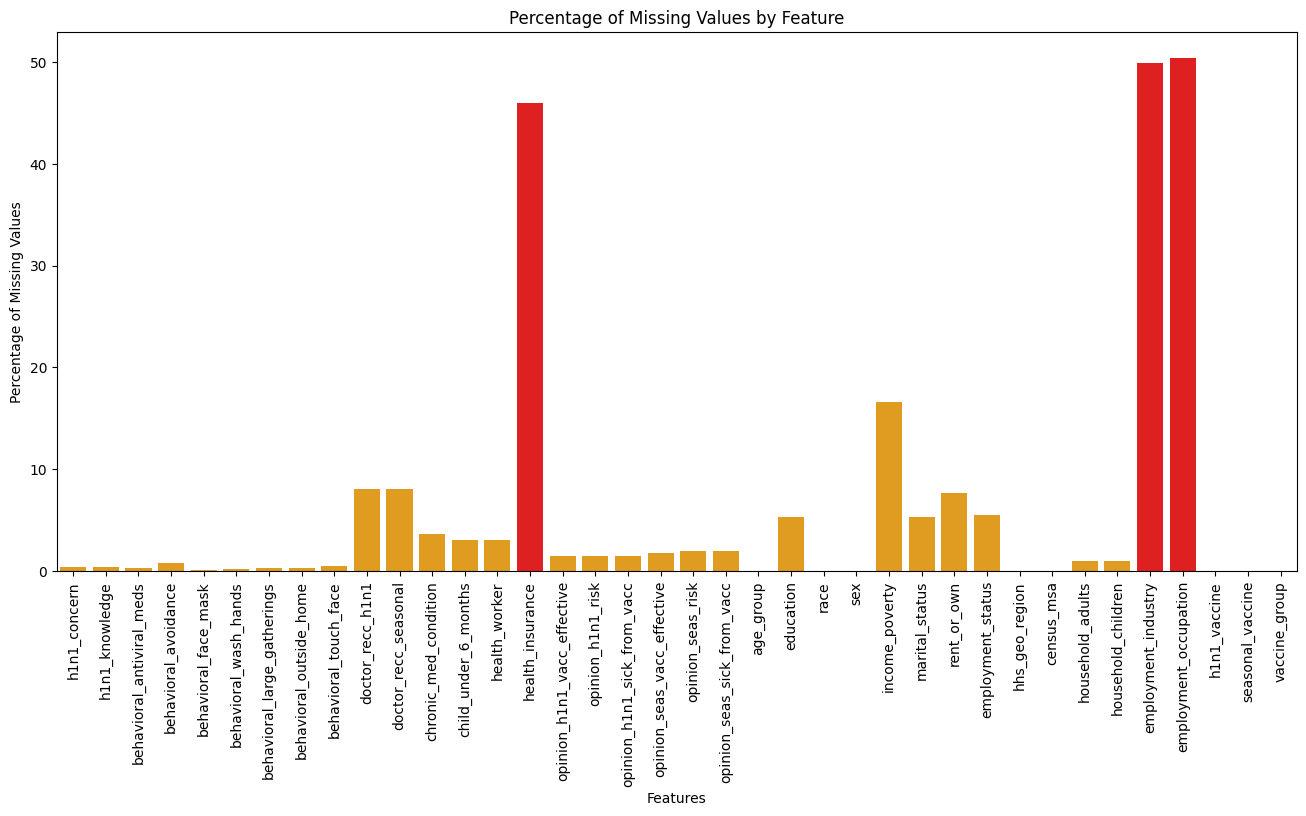

In [110]:
null = df_patients.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (null / len(df_patients)) * 100

# Plot the missing values
plt.figure(figsize=(16, 7))
colors = ['red' if val > 20 else 'orange' for val in missing_percentage.values]
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=colors, hue=missing_percentage.index, legend=False)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.title('Percentage of Missing Values by Feature')
plt.show()

In [111]:
df_patients['income_poverty'].unique() #?? al medio o a donde?

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [112]:
# df_patients.dropna(subset=['income_poverty'], inplace=True)

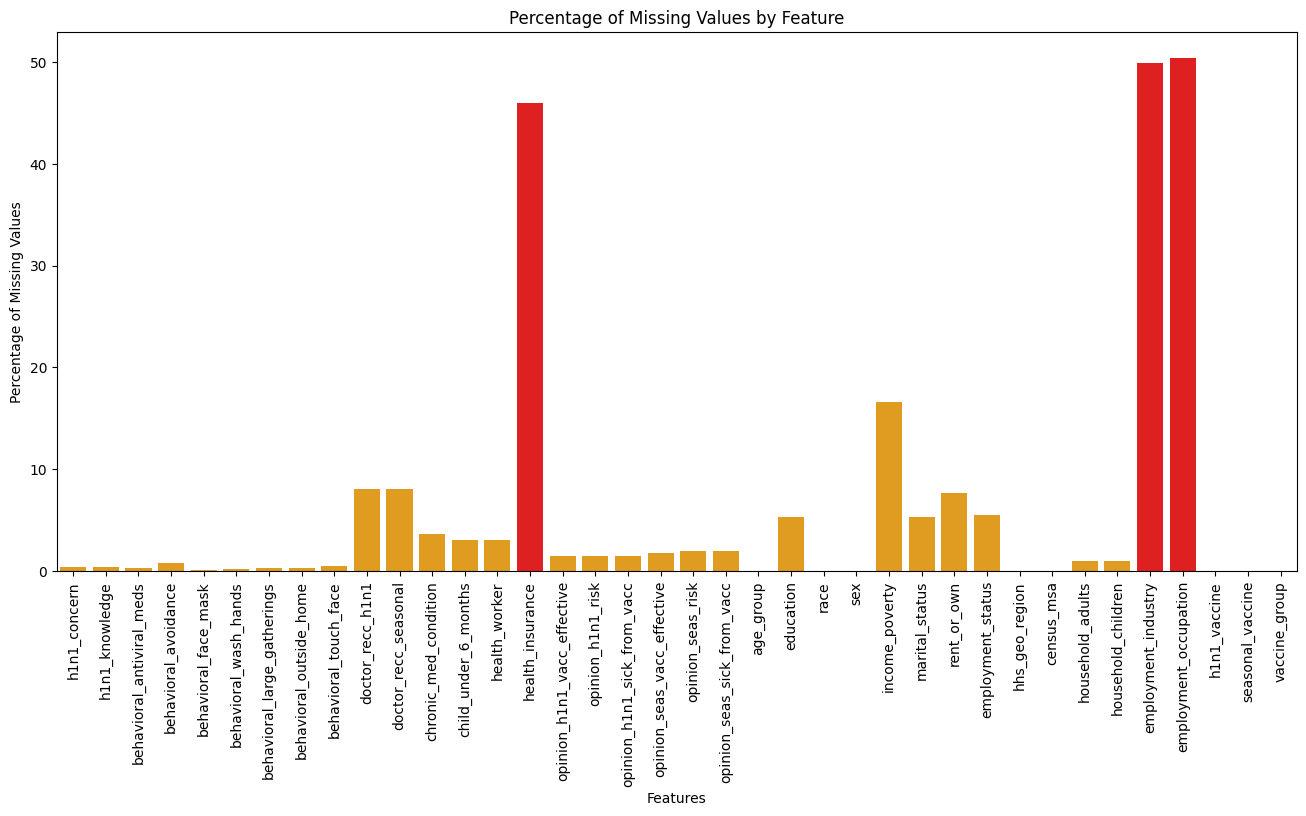

In [113]:
null = df_patients.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (null / len(df_patients)) * 100

# Plot the missing values
plt.figure(figsize=(16, 7))
colors = ['red' if val > 20 else 'orange' for val in missing_percentage.values]
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=colors, hue=missing_percentage.index, legend=False)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.title('Percentage of Missing Values by Feature')
plt.show()

In [114]:
# df_patients.dropna(inplace=True)

In [115]:
df_patients.shape

(26707, 38)

In [116]:
float_columns = df_patients.select_dtypes(include=['float64']).columns
categorical_columns = df_patients.select_dtypes(include=['object']).columns

df_patients[float_columns]=df_patients[float_columns].fillna(-1)
df_patients[categorical_columns]=df_patients[categorical_columns].fillna('missing')

## Correlation

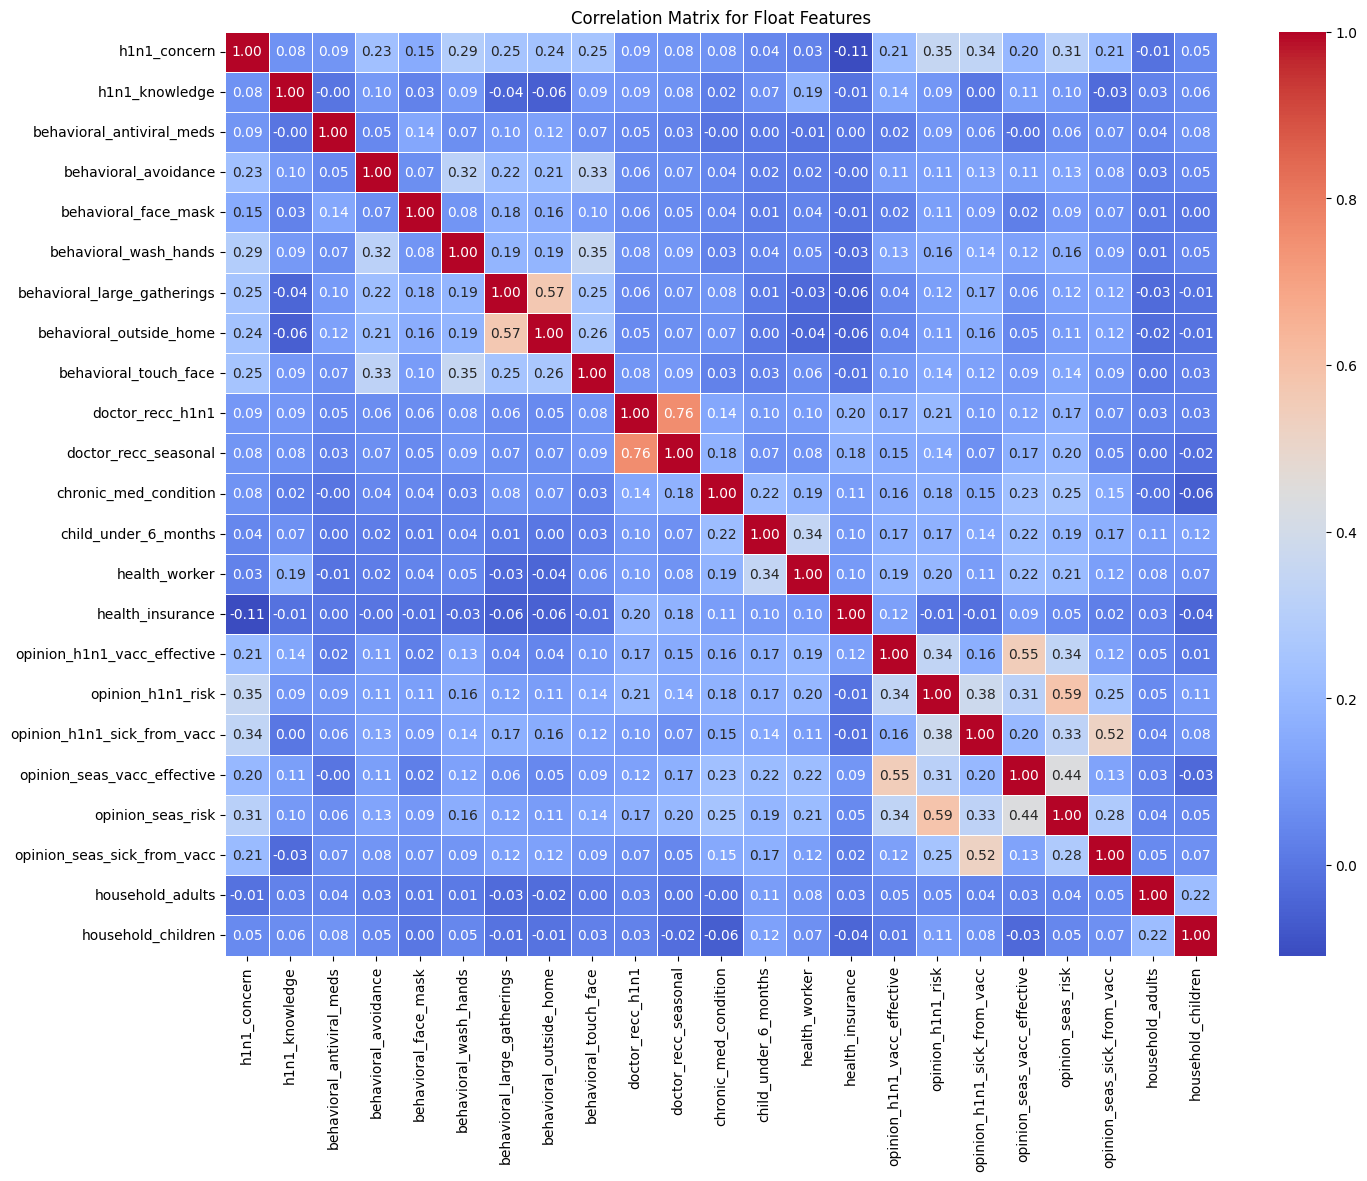

In [117]:
# Filter the dataframe to include only float features
float_features = df_patients.select_dtypes(include=['float64'])

# Calculate the correlation matrix
correlation_matrix = float_features.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Float Features')
plt.show()

We can check here for all the categorical data, to see if there is something wrong, or that we need to transform.

In [118]:
cat_features = df_patients.select_dtypes(include=['object']).columns

for i in cat_features:
    print(i, end=": ")
    print(df_patients[i].unique())

age_group: ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education: ['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'missing']
race: ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex: ['Female' 'Male']
income_poverty: ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'missing']
marital_status: ['Not Married' 'Married' 'missing']
rent_or_own: ['Own' 'Rent' 'missing']
employment_status: ['Not in Labor Force' 'Employed' 'Unemployed' 'missing']
hhs_geo_region: ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa: ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry: ['missing' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'ldnlellj' 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb'
 'atmlpfrs' 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo'
 'cfqqtusy' 'mcubkhph' 'haxffmxo' 'qnlwzans']
employment_occupation: ['missing

As we can see, there seems to be a column with no useful data, so we can start by removing that one.

In [119]:
df_patients.drop(columns=['hhs_geo_region', 'employment_industry', 'employment_occupation'], inplace=True)
cat_features = df_patients.select_dtypes(include=['object']).columns

In [120]:
# Transform columns from object type to categorical type, with order information baked in

df_patients["age_group"] = pd.Categorical(
    df_patients["age_group"],
    categories=[
        "missing",
        "18 - 34 Years",
        "35 - 44 Years",
        "45 - 54 Years",
        "55 - 64 Years",
        "65+ Years"
    ],
    ordered=True,
)

df_patients["education"] = pd.Categorical(
    df_patients["education"],
    categories=["missing","< 12 Years", "12 Years", "Some College", "College Graduate"],
    ordered=True,
)

df_patients["race"] = pd.Categorical(
    df_patients["race"],
    categories=["missing", "White", "Black", "Hispanic", "Other or Multiple"],
    ordered=True,
)

df_patients["sex"] = pd.Categorical(
    df_patients["sex"], categories=["missing", "Female", "Male"], ordered=True
)

df_patients["income_poverty"] = pd.Categorical(
    df_patients["income_poverty"],
    categories=["missing","Below Poverty", "<= $75,000, Above Poverty", "> $75,000"],
    ordered=True,
)

df_patients["marital_status"] = pd.Categorical(
    df_patients["marital_status"], categories=["missing", "Not Married", "Married"], ordered=True
)

df_patients["rent_or_own"] = pd.Categorical(
    df_patients["rent_or_own"], categories=["missing", "Rent", "Own"], ordered=True
)

df_patients["employment_status"] = pd.Categorical(
    df_patients["employment_status"],
    categories=["missing","Not in Labor Force", "Employed", "Unemployed"],
    ordered=True,
)

df_patients["census_msa"] = pd.Categorical(
    df_patients["census_msa"],
    categories=["Non-MSA", "MSA, Not Principle  City", "MSA, Principle City", "missing"],
    ordered=True,
)

We can also transform some columns from their string representation, into something easier to process, like changing the rent_or_own to owns_home and use 0 or 1. Maybe it is not necesary? 

In [121]:
# TODO check if useful in next class
# Convert the categorical columns to numerical in rent_or_own and rename the column as owns_home
# df_patients['rent_or_own_n'] = df_patients['rent_or_own'].replace({'Own': 1, 'Rent': 0})

# df_patients['marital_status_n'] = df_patients['marital_status'].replace({'Not Married': 0, 'Married': 1})

# df_patients['education_n'] = df_patients['education'].replace({'< 12 Years': 0, '12 Years': 1, 'Some College': 2, 'College Graduate': 3})

# df_patients['income_poverty_n'] =  df_patients['income_poverty'].replace({'Below Poverty': 0, '<= $75,000, Above Poverty': 1, '> $75,000': 2})

# df_patients['age_group_n'] = df_patients['age_group'].replace({'18 - 34 Years': 0, '35 - 44 Years': 1, '45 - 54 Years': 2, '55 - 64 Years': 3, '65+ Years': 4})

# # race, sex employment_status and census_msa
# df_patients['race'] = df_patients['race'].replace({'White': 0, 'Black': 1, 'Hispanic': 2, 'Other or Multiple': 3})

# df_patients['sex'] = df_patients['sex'].replace({'Female':0, 'Male':1})

# df_patients['employment_status'] = df_patients['employment_status'].replace({'Not in Labor Force': 0, 'Employed': 1, 'Unemployed': 2})

# df_patients['census_msa'] = df_patients['census_msa'].replace({'Non-MSA': 0, 'MSA, Not Principle  City': 1, 'MSA, Principle City': 2})

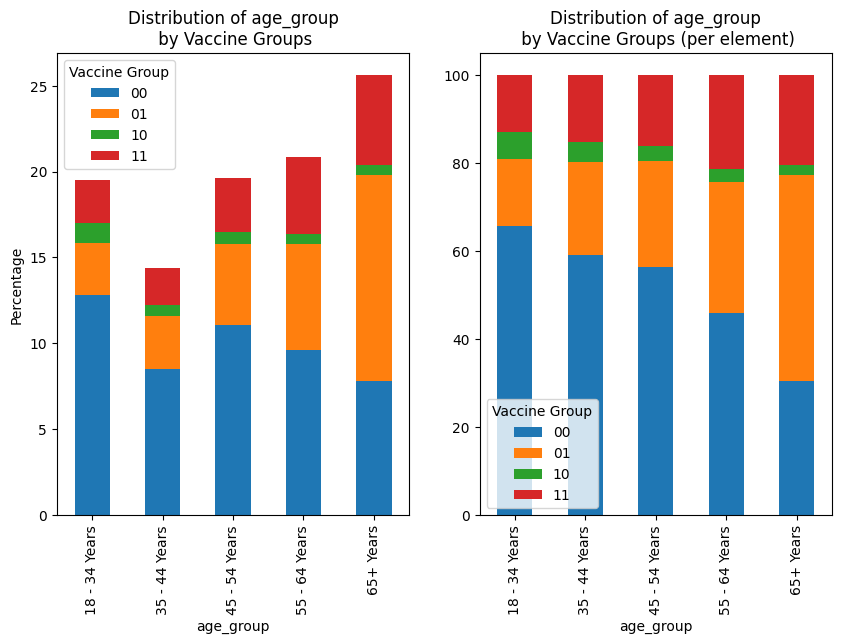

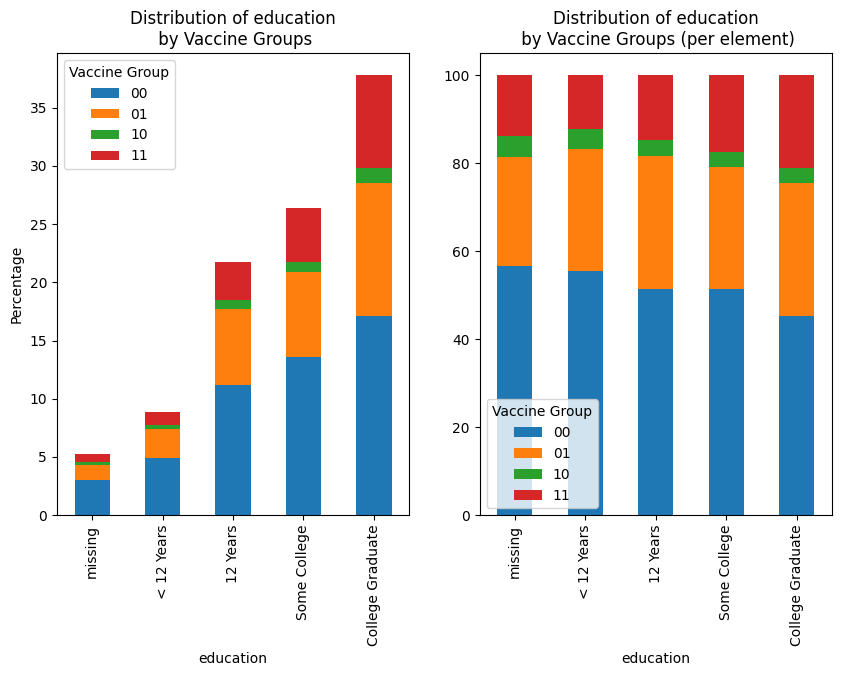

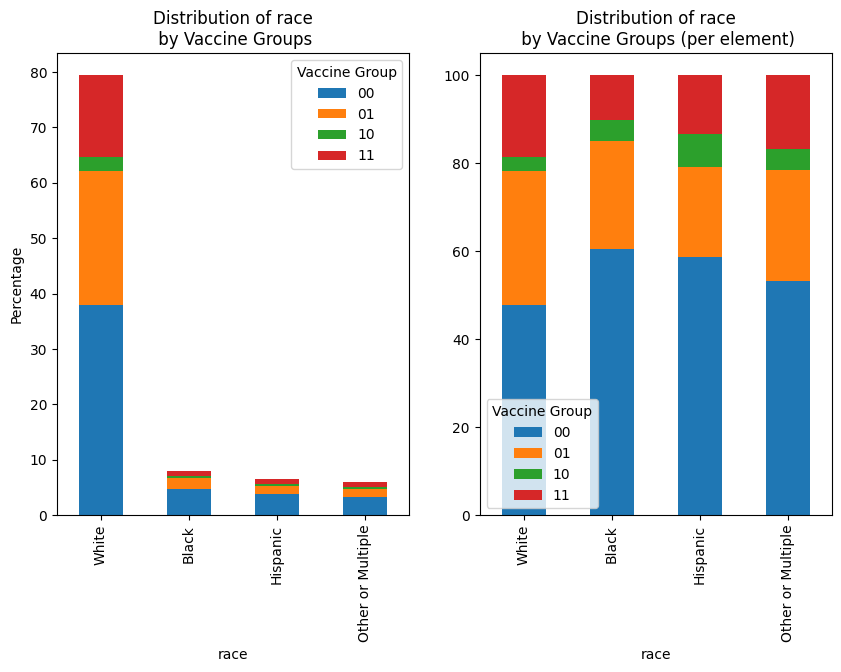

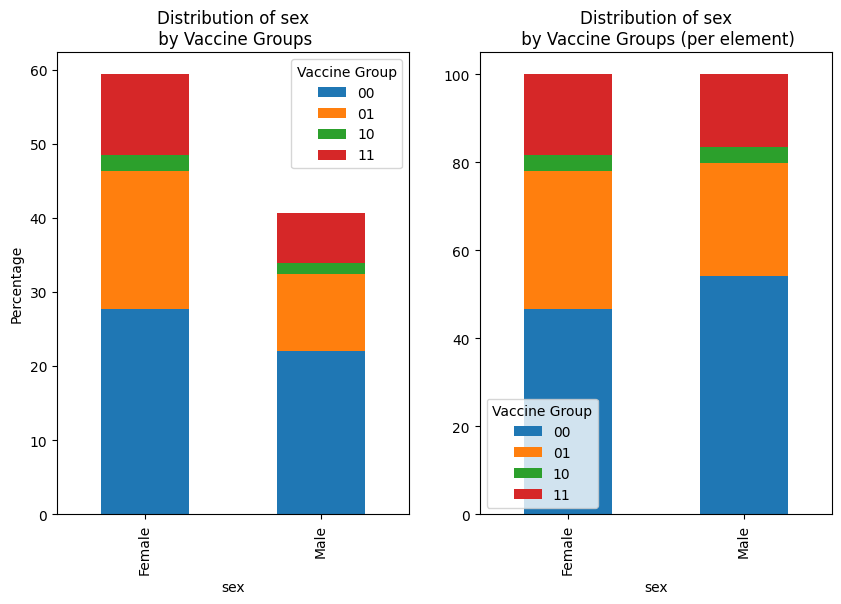

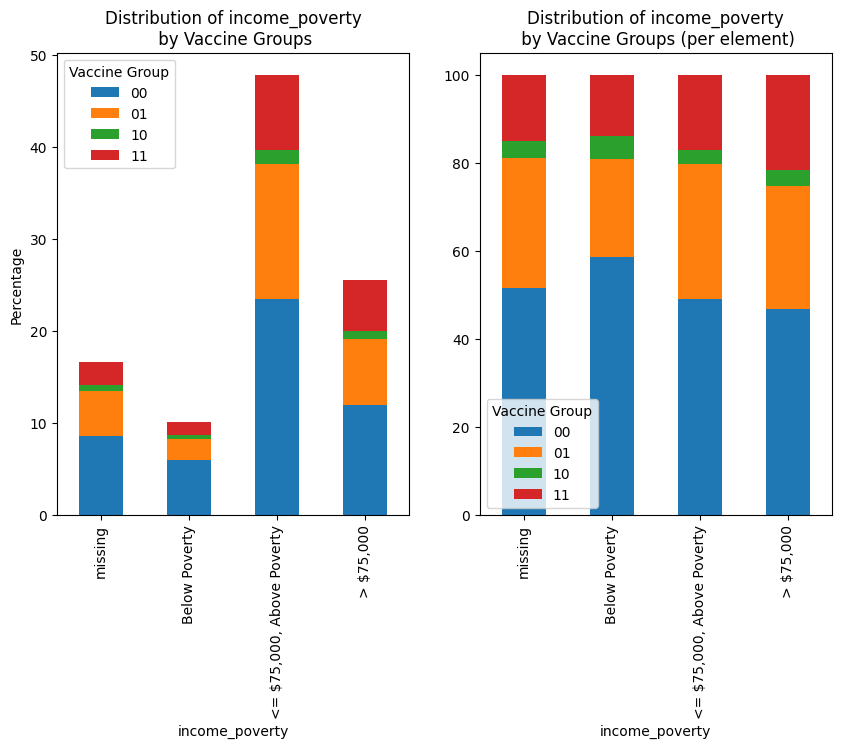

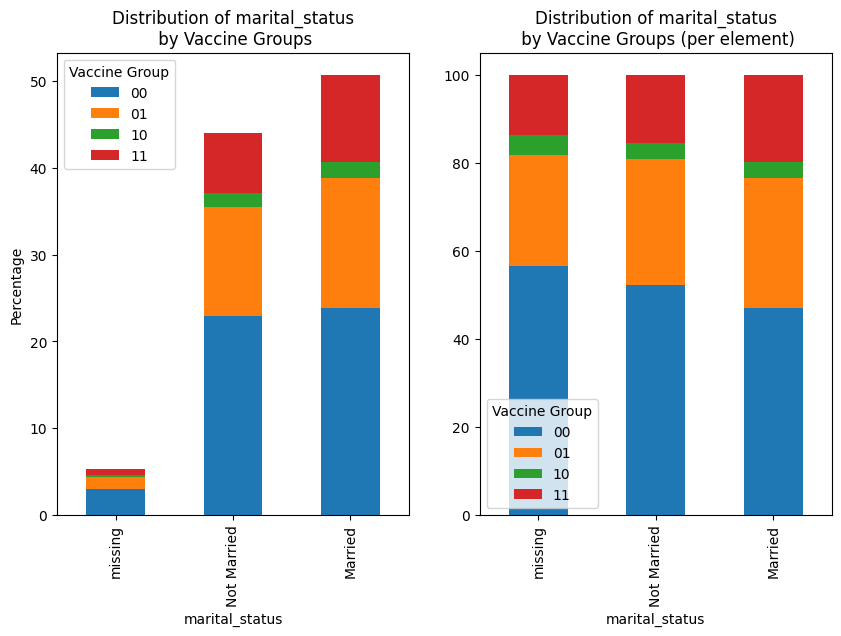

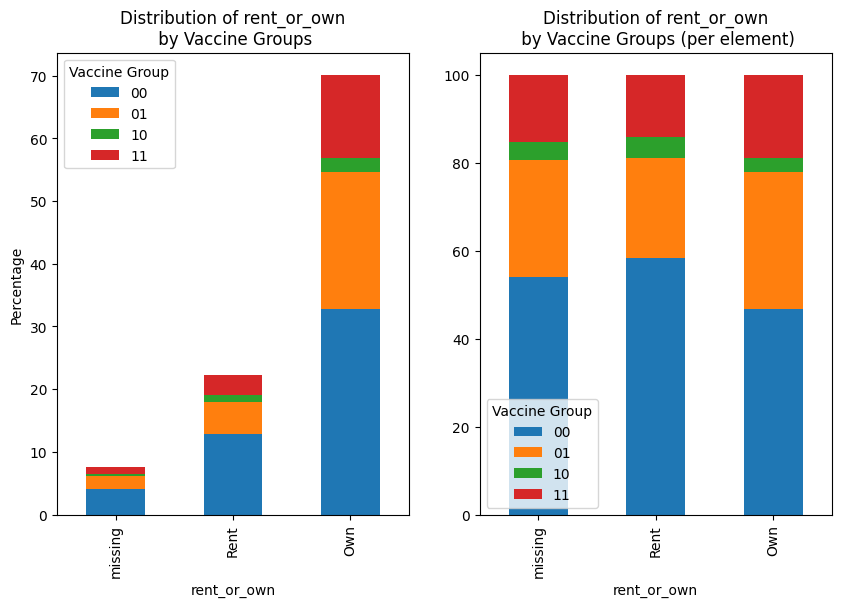

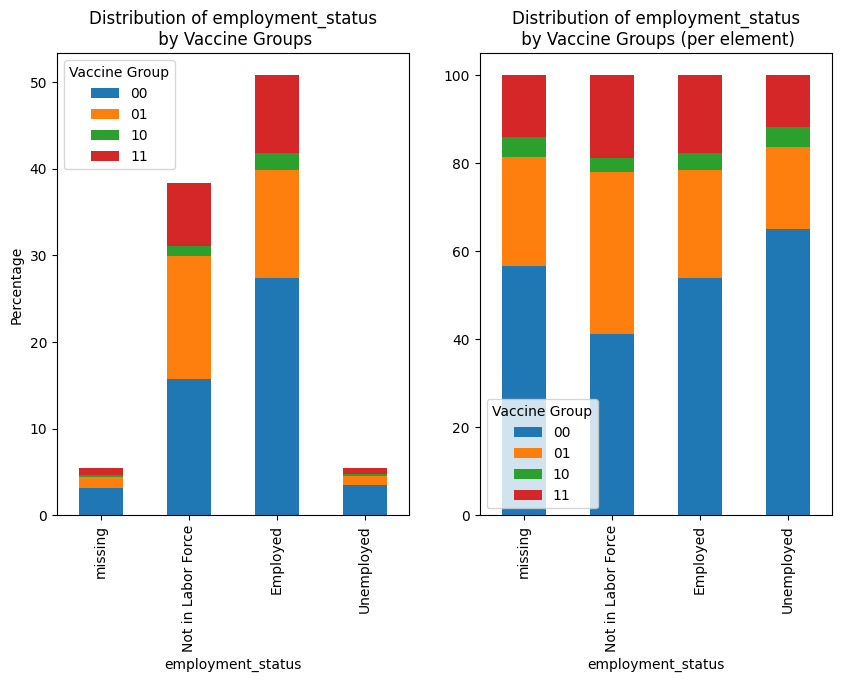

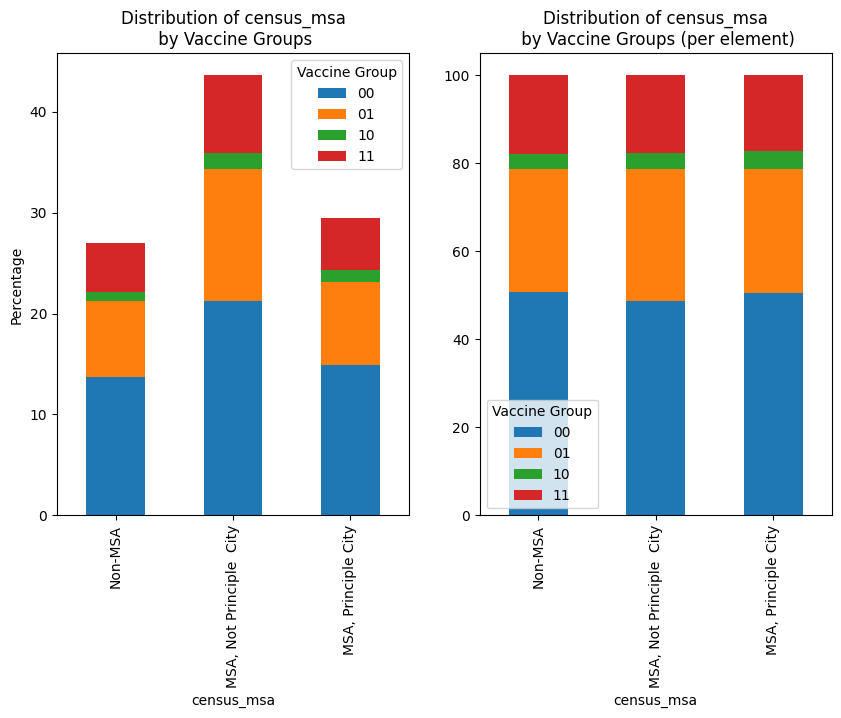

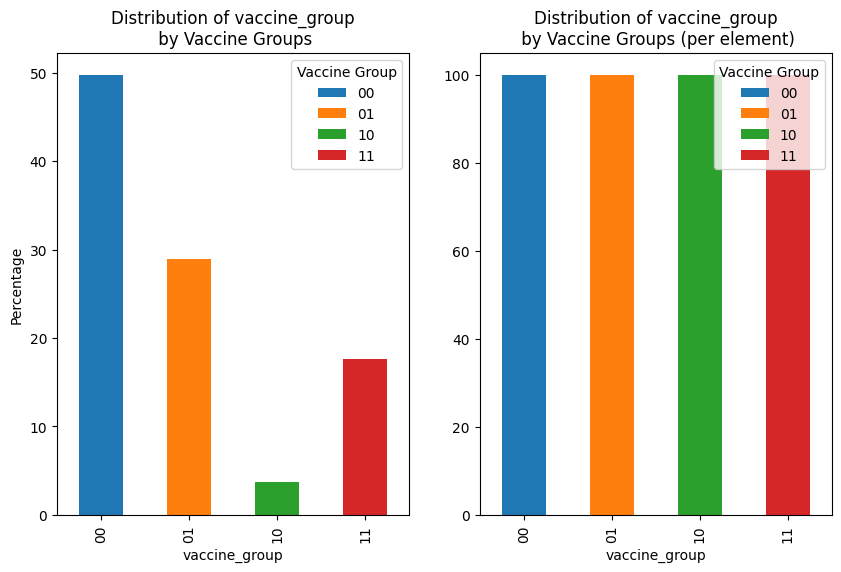

In [122]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure


for i in cat_features:

    # Plot the stacked bar plot
    fig:Figure; cont_table_ax:Axes; cont_table_ax_n:Axes
    fig, (cont_table_ax, cont_table_ax_n) = plt.subplots(1, 2)
    
    cont_table = pd.crosstab(df_patients[i], df_patients['vaccine_group'],normalize='all') * 100
    cont_table.plot(kind='bar', stacked=True, figsize=(10, 6),ax=cont_table_ax)
    cont_table_n = pd.crosstab(df_patients[i], df_patients['vaccine_group'],normalize='index') * 100
    cont_table_n.plot(kind='bar', stacked=True, figsize=(10, 6),ax=cont_table_ax_n)

    cont_table_ax.set_xlabel(f'{i}')
    cont_table_ax.set_ylabel('Percentage')
    cont_table_ax.set_title(f'Distribution of {i}\n by Vaccine Groups')
    cont_table_ax.legend(title='Vaccine Group')
    
    cont_table_ax_n.set_xlabel(f'{i}')
    cont_table_ax_n.set_title(f'Distribution of {i}\n by Vaccine Groups (per element)')
    cont_table_ax_n.legend(title='Vaccine Group')
    plt.show()

## Test data

The same operations that we did for the training data, we will be done for the test data.

In [123]:
columns = df_patients.drop(columns =['h1n1_vaccine', 'seasonal_vaccine', 'vaccine_group']).columns
columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa', 'household_adults',
       'household_children'],
      dtype='object')

In [124]:
test_features.set_index('respondent_id', inplace=True)
test_features = test_features[columns] 

In [125]:
test_features.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,"MSA, Not Principle City",1.0,0.0
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,Non-MSA,3.0,0.0


In [126]:
float_columns = test_features.select_dtypes(include=['float64']).columns
categorical_columns = test_features.select_dtypes(include=['object']).columns

test_features[float_columns]=test_features[float_columns].fillna(-1)
test_features[categorical_columns]=test_features[categorical_columns].fillna('missing')

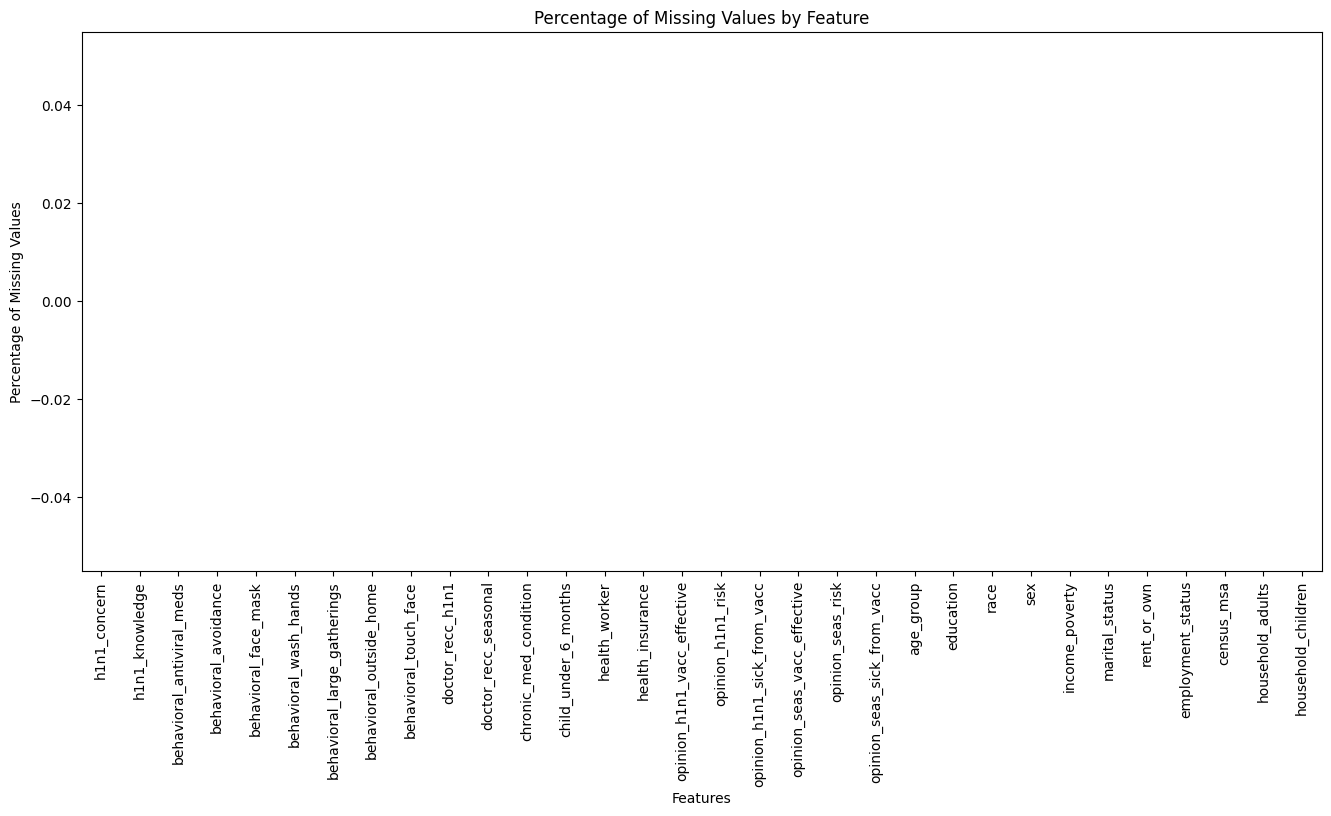

In [127]:
null = test_features.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (null / len(test_features)) * 100

# Plot the missing values
plt.figure(figsize=(16, 7))
colors = ['red' if val > 20 else 'orange' for val in missing_percentage.values]
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=colors, hue=missing_percentage.index, legend=False)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.title('Percentage of Missing Values by Feature')
plt.show()

In [128]:
# Combine training and test data to fit the encoder with all possible categories
cat_features = cat_features.drop('vaccine_group')
combined_data = pd.concat([df_patients[cat_features], test_features[categorical_columns]], axis=0)

# Refit the encoder with the combined data
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(combined_data)

# Transform 
df_encoded = df_patients.copy()
df_encoded.drop(columns=['vaccine_group'], inplace=True)
df_encoded[cat_features] = encoder.transform(df_encoded[cat_features])
test_encoded = test_features.copy()
test_encoded[categorical_columns] = encoder.transform(test_encoded[categorical_columns])

In [129]:
df_encoded.to_csv('data/df_encoded.csv')
test_encoded.to_csv('data/test_encoded.csv')